Shape of the dataset: (15807, 14)
         date      admin1      admin2            market  latitude  longitude  \
0       #date  #adm1+name  #adm2+name  #loc+market+name  #geo+lat   #geo+lon   
1  2006-01-15       Coast     Mombasa           Mombasa     -4.05  39.666667   
2  2006-01-15       Coast     Mombasa           Mombasa     -4.05  39.666667   
3  2006-01-15       Coast     Mombasa           Mombasa     -4.05  39.666667   
4  2006-01-15       Coast     Mombasa           Mombasa     -4.05  39.666667   

             category      commodity        unit         priceflag  \
0          #item+type     #item+name  #item+unit  #item+price+flag   
1  cereals and tubers          Maize          KG            actual   
2  cereals and tubers  Maize (white)       90 KG            actual   
3     pulses and nuts          Beans          KG            actual   
4     pulses and nuts    Beans (dry)       90 KG            actual   

          pricetype   currency   price    usdprice  
0  #item+pr

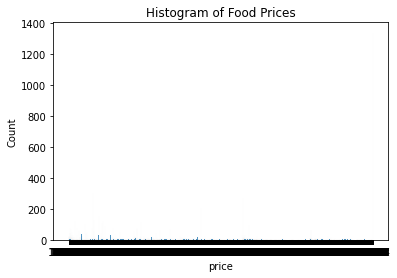

ParserError: Unknown string format: #date

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("wfp_food_prices_ken.csv")

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Print the first 5 rows of the dataset
print(df.head())

# Check for missing values
print("Missing values:\n", df.isna().sum())

# Check the data types of the columns
print("Data types:\n", df.dtypes)

# Check the unique values in each column
for col in df.columns:
    print(f"Unique values in {col}:", df[col].nunique())

# Check the summary statistics of the price column
print("Summary statistics of price column:\n", df["price"].describe())

# Plot a histogram of the price column
sns.histplot(data=df, x="price")
plt.title("Histogram of Food Prices")
plt.show()

# Plot a line graph of the average price over time
df["date"] = pd.to_datetime(df["date"])
df_avg_price = df.groupby("date").agg({"price": "mean"})
sns.lineplot(data=df_avg_price, x="date", y="price")
plt.title("Average Food Price Over Time")
plt.show()

# Plot a bar chart of the average price by commodity
df_avg_price_by_comm = df.groupby("commodity").agg({"price": "mean"}).sort_values("price", ascending=False)
sns.barplot(data=df_avg_price_by_comm, x="price", y="commodity")
plt.title("Average Food Price by Commodity")
plt.xlabel("Price")
plt.ylabel("Commodity")
plt.show()

# Plot a scatter plot of the relationship between price and latitude
sns.scatterplot(data=df, x="latitude", y="price")
plt.title("Relationship between Price and Latitude")
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.show()
